# Image Processing
# Proj IV - Edge Detection

## 1. Introduction

<b>Edges are sudden changes in the values of pixels.</b> These changes may be caused by the boundaries of an object, variations in scene lighting, or other factors.


## 2. The gradient method
The gradient method says that edges are sudden changes in pixel values, so this implies high values of the gradient in that point (gradients are just derivaties, but in multi-dimensional spaces).

The algorithm computes the horizontal and vertical gradients of each pixel in the image, where:
 - <b>the horizontal gradient is the difference between the current pixel and the one on the right</b>
 $$dx = I[i,j]-I[i,j+1]$$
 - <b>the vertical gradient is the difference between the current pixel and the one below</b>
 $$dy = I[i,j]-I[i+1,j]$$

Knowing the gradients, the edge strength is the magnitude of the gradient:
$$O[i,j] = \sqrt{dx^2+dy^2}$$

<img src="media/derivative.png"><center>Figure 2.1. Gradient computation</center>

There are some other alternate solutions for computing the horizontal and vertical gradients:
- subtract the pixels on the left and above, instead of right and below
- subtract the pixel below from the pixel above and the pixel on the right from the pixel on the left

<i>Computing the gradients is nothing more than filtering the image with some particular kernels! Think about it. How would you define the 3x3 kernels for the two gradients?</i>


## 3. Laplacian operators (second derivatives) used for sharpening

<p> Image sharpening means increasing the visibility of the image regions. So sharpening filter aims to increase the visibility of the contours (edges) of the objects in the image. </p>

<p> In order to obtain contours we will use a secont derivative kernel (Laplacian). This is a high pass filter and keeps the details in the image (edges). The resulting (filtered) image is added to the original one in order to obtain a sharpened version. The result can be seen in <b>Figure 3.2.</b></p>


<br>
<figure>
    <img src='media/imag_6.png' width:150><br>
    <center><b>Figure 3.2. </b>Sharpening filter</center>
</figure>
<br><br><br> 


### Exercise 1. Implement the Gradient method on a noisy grayscale image:

(0) Write a function that applies the Gradient method on a grayscale image. Use the kernels in figure 2.1 when computing the horizontal and vertical gradients.  <br>
(1) Read an image and convert it to grayscale<br>
(2) Add Gaussian noise to the image<br>
(3) Apply the function written above on the original image and on the noisy image. Compare the results. What do you notice? How does the noise influence the contours. <br>

Hint for step 0: Be carefull to compute in all pixels where the kernels can be included inside the image. <br>
Hint for step 3: Be carefull what are the possible minimum and maximum values in the images to be able to compare them correctly

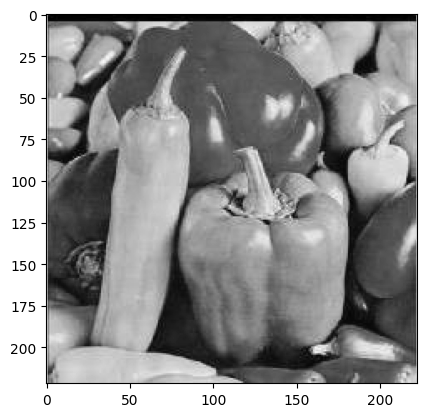

<Figure size 640x480 with 0 Axes>

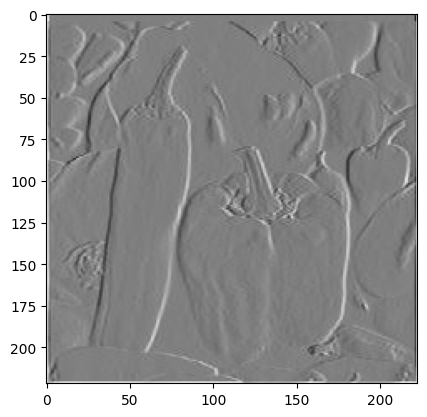

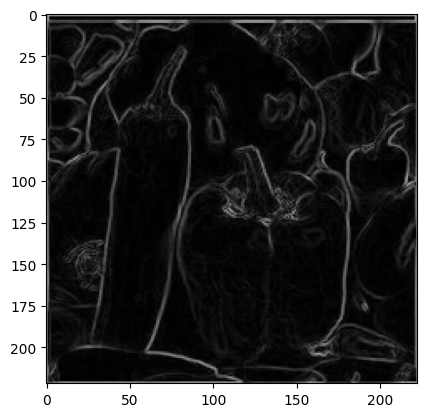

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import math

def gradient(img):
    h, w = img.shape

    mask_x = np.array([[0, 0, 0], [1, 0, -1], [0, 0, 0]])
    mask_y = np.array([[0, 1, 0], [0, 0, 0], [0, -1, 0]])

    img_fx = img.copy()
    img_fy = img.copy()
    img_grad = img.copy()

    w_size = 3
    border = w_size // 2

    for i in range(border, h - border):
        for j in range(border, w - border):
            V = img[i - border:i + 1 + border, j - border:j + 1 + border]
            V_x = V * mask_x
            V_y = V * mask_y
            img_fx[i, j] = np.sum(V_x)
            img_fy[i, j] = np.sum(V_y)
            img_grad[i, j] = math.sqrt(img_fx[i, j] ** 2 + img_fy[i, j] ** 2)
            
    plt.figure()
    plt.imshow(img_fx, cmap = 'gray', vmin = -255, vmax = 255)
    
    plt.figure()
    plt.imshow(img_fy, cmap = 'gray', vmin = -255, vmax = 255)
 
    return img_grad

img = io.imread('peppers.jpg')
img = color.rgb2gray(img)
img = (img * 255).astype(int)

plt.figure()
plt.imshow(img, cmap = 'gray'),

plt.figure()
plt.imshow(gradient(img), cmap = 'gray', vmin = 0, vmax = 255 * math.sqrt(2))


### Exercise 2. Implement the Laplacian operator for contour extraction. Use it to sharpen an image:

(0) Write a function to extract contours with the Laplacian operator (second derivative). The kernel for the Laplacian is shown in Figure 3.2 at step 1:<br>
[[-1 -1 -1]<br>
[-1  8  -1]<br>
[-1 -1 -1]]<br>
  
(1) Read an image and convert it to grayscale<br>
(2) Apply the function written at step (0) to get the contours. Visualize the contours (be carefull what are the possible minimum and maximum values in the resulting image).<br>
(3) Add the result from the Laplacian operator to the original image (step 2 from figure 3.2). Visualize the result.
  


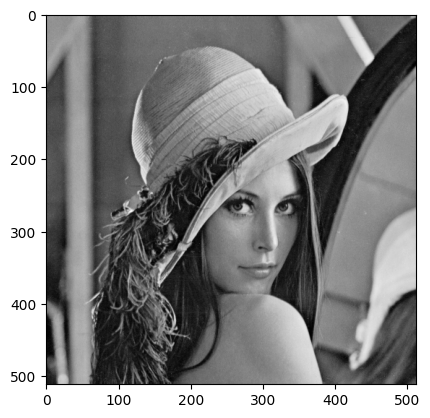

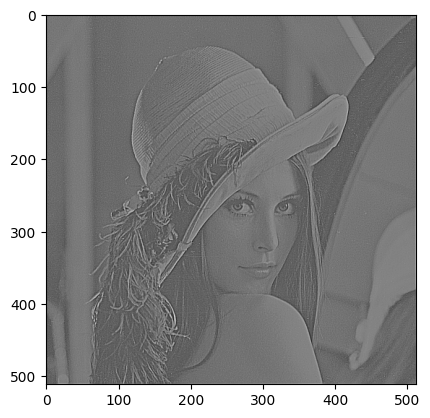

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import math

def laplacian(img):
    h, w = img.shape

    mask = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    img_lapl = img.copy()

    w_size = 3
    border = w_size // 2

    for i in range(border, h - border):
        for j in range(border, w - border):
            V = img[i - border:i + 1 + border, j - border:j + 1 + border]
            img_lapl[i, j] = np.sum(V * mask)
                
    return img_lapl

img = io.imread('lena.png')
img = color.rgb2gray(img)
img = (img * 255).astype(int)

plt.figure()
plt.imshow(img, cmap = 'gray'),

plt.figure()
plt.imshow(laplacian(img) + img, cmap = 'gray')
